# Определение возраста покупателей

Перед нами стоит задача научить нейросеть определять возраст покупателей по фото. Для это нам предоставлен набор фотографий с указанием возраста человека.

## Исследовательский анализ данных

# Исследовательский анализ данных

В исследовательском анализе данных нам необходимо:
- Посмотреть на размер выборки.
- Построить график распределения возраста в выборке.
- Напечатать на экране 10–15 фотографий и посмотреть, как устроен датасет.
- Сделать выводы о том, как результаты исследования повлияют на обучение модели.

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, Dropout, GlobalAveragePooling2D
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams ['figure.figsize'] = [10, 4]
import warnings
warnings.filterwarnings('ignore')

**Проведем загрузку данных**

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
labels.shape

(7591, 2)

В датасете 7591 фотография с указанием возраста. Пропусков нет. Столбец file_name  относится к типу object, столбец real_age имеет тип данных int64. Типы данных на мой взгляд верные, так как возраст должен быть указан только целым числом.

Думаю по количеству фотографий сложно определить, возмоможно ли по ним научить нейросеть определять возраст. Для начала нужно посмотреть распределение по возрасту да и сами фотографии, чтобы не было "мусорных" фотографий, да и фото без лиц или с закрытыми лицами очками или маской. Для того, чтобы это проверить проведем анализ, приведенный ниже.

**Построим график распределения возраста на выборке.**

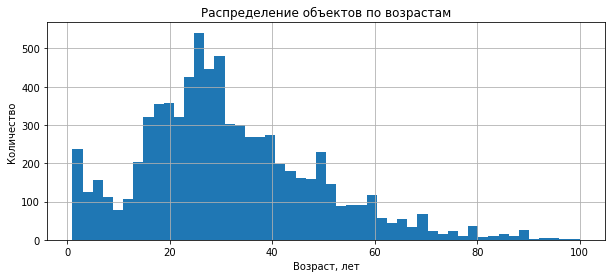

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [6]:
labels.hist(bins=50)
plt.title('Распределение объектов по возрастам')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество')
plt.show()
labels.describe()

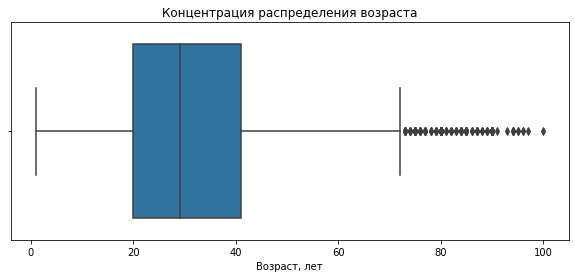

In [7]:
sns.boxplot(labels["real_age"])
plt.title('Концентрация распределения возраста')
plt.xlabel('Возраст, лет')
plt.show()

Наибольшее число людей на фото имеют возраст от 20 до 41 лет, в то же время как самый младший человек на фото имеет возраст 1 год, а самый старый 100 лет. Фото людей с возрастом более 70 лет не много, это связано с тем, что долгожителей не так много. Думаю для корректного обучения модели данных предостаточно.

**Напечатаем на экране 16 фотографий.**

Файл       : 000004.jpg
Возраст    : 17
Размерность: (114, 114, 3)


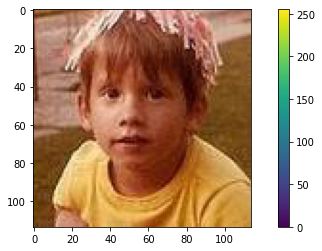

Файл       : 000018.jpg
Возраст    : 40
Размерность: (784, 784, 3)


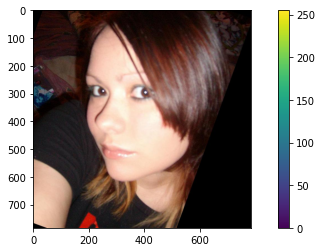

Файл       : 000080.jpg
Возраст    : 27
Размерность: (133, 133, 3)


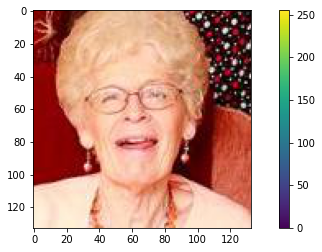

Файл       : 000050.jpg
Возраст    : 42
Размерность: (370, 370, 3)


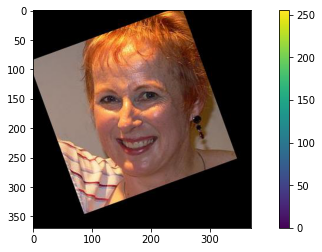

Файл       : 000017.jpg
Возраст    : 5
Размерность: (212, 212, 3)


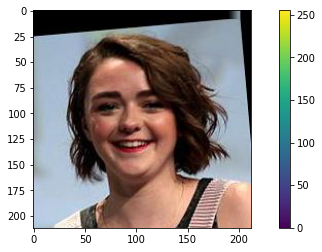

Файл       : 000027.jpg
Возраст    : 35
Размерность: (636, 637, 3)


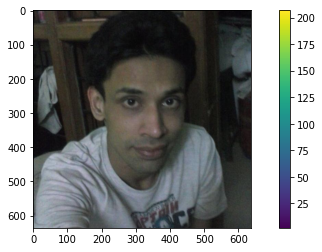

Файл       : 000024.jpg
Возраст    : 5
Размерность: (412, 412, 3)


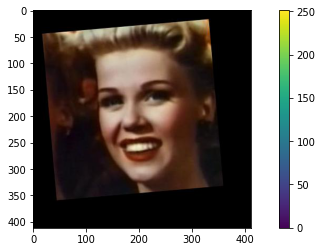

Файл       : 000043.jpg
Возраст    : 30
Размерность: (311, 311, 3)


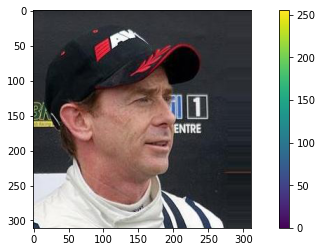

Файл       : 000026.jpg
Возраст    : 24
Размерность: (898, 897, 3)


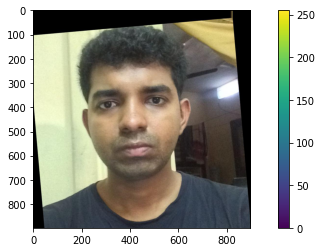

Файл       : 000039.jpg
Возраст    : 4
Размерность: (724, 724, 3)


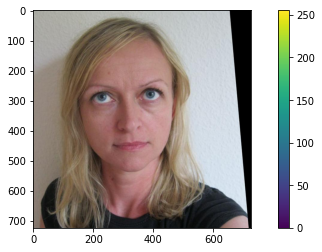

Файл       : 000017.jpg
Возраст    : 5
Размерность: (636, 636, 3)


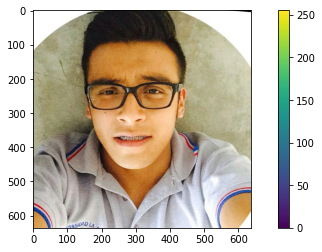

Файл       : 000051.jpg
Возраст    : 23
Размерность: (803, 803, 3)


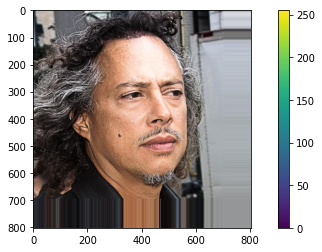

In [8]:
for i,k in zip(labels.file_name[:12],labels.real_age[:12]):
    print('Файл       :', labels.loc[k, 'file_name'])
    print('Возраст    :', labels.loc[k, 'real_age'])
    image = Image.open('/datasets/faces/final_files/'+i)
    array = np.array(image)
    print('Размерность:', array.shape)
    plt.imshow(array)
    plt.colorbar()
    plt.show()

    Перед нами 7591 фотографии с людьми разного возраста и пола, фотогрфии выполненые в различных бытовых условиях и с разным освещением.
    Все изображения имеют формат jpg, и выполнены в цветном формате, т.е. имеют три цветовых канала RGB. Размерность у всех фотографий разная.
    Для предсказания мы будем использовать предобученную нейросеть ResNet50.
    По моему мнению, фотографии размечены верно и соответствуют фактическому возрасту человека.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

# import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, Dropout, GlobalAveragePooling2D
import numpy as np
 
optimizer = Adam(learning_rate = 0.0001)



def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_datagen_flow
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_datagen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

    
def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch=None, validation_steps=None):
    test_datagen_flow = test_data
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_datagen_flow)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

```

```

Train for 356 steps, validate for 119 steps
Epoch 1/20
2024-03-18 09:14:21.459994: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-03-18 09:14:37.952478: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 365s - loss: 240.7032 - mae: 11.0698 - val_loss: 934.7552 - val_mae: 25.7151
Epoch 2/20
356/356 - 41s - loss: 86.3869 - mae: 7.0345 - val_loss: 266.5371 - val_mae: 12.8232
Epoch 3/20
356/356 - 39s - loss: 58.0612 - mae: 5.7883 - val_loss: 93.9320 - val_mae: 7.1706
Epoch 4/20
356/356 - 39s - loss: 40.4833 - mae: 4.8748 - val_loss: 74.1698 - val_mae: 6.5780
Epoch 5/20
356/356 - 39s - loss: 33.5516 - mae: 4.4125 - val_loss: 71.1484 - val_mae: 6.1847
Epoch 6/20
356/356 - 39s - loss: 25.3278 - mae: 3.8681 - val_loss: 73.7777 - val_mae: 6.2868
Epoch 7/20
356/356 - 39s - loss: 20.1561 - mae: 3.4338 - val_loss: 69.7917 - val_mae: 6.2399
Epoch 8/20
356/356 - 39s - loss: 17.9252 - mae: 3.2350 - val_loss: 68.5880 - val_mae: 6.1289
Epoch 9/20
356/356 - 39s - loss: 14.8110 - mae: 2.9030 - val_loss: 70.5380 - val_mae: 6.4736
Epoch 10/20
356/356 - 39s - loss: 13.3929 - mae: 2.8125 - val_loss: 63.1890 - val_mae: 5.9994
Epoch 11/20
356/356 - 39s - loss: 12.0492 - mae: 2.6436 - val_loss: 65.1123 - val_mae: 5.9699
Epoch 12/20
356/356 - 39s - loss: 12.1085 - mae: 2.6330 - val_loss: 67.0991 - val_mae: 6.0482
Epoch 13/20
356/356 - 39s - loss: 11.3613 - mae: 2.5430 - val_loss: 73.4880 - val_mae: 6.2735
Epoch 14/20
356/356 - 41s - loss: 11.2949 - mae: 2.5662 - val_loss: 62.1467 - val_mae: 5.8480
Epoch 15/20
356/356 - 40s - loss: 11.3256 - mae: 2.5561 - val_loss: 60.8060 - val_mae: 5.7961
Epoch 16/20
356/356 - 39s - loss: 11.9256 - mae: 2.5978 - val_loss: 74.0208 - val_mae: 6.3855
Epoch 17/20
356/356 - 39s - loss: 10.7047 - mae: 2.4921 - val_loss: 68.1493 - val_mae: 6.2418
Epoch 18/20
356/356 - 39s - loss: 9.7862 - mae: 2.3864 - val_loss: 73.7958 - val_mae: 6.2605
Epoch 19/20
356/356 - 39s - loss: 9.8396 - mae: 2.3565 - val_loss: 65.0368 - val_mae: 6.0292
Epoch 20/20
356/356 - 39s - loss: 9.1475 - mae: 2.2771 - val_loss: 60.6531 - val_mae: 5.7780
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 59.5430 - mae: 5.6917
Test MAE: 5.6917

```

## Анализ обученной модели

По итогам обучения предобученной нейросети Resnet50 можно сделать следующие выводы:
- Метирка MAE на тестовой выборке равная 5.6917, это означает, что нейросеть ошибается на менее чем 6 лет при определении возраста. Этого значения более, чем достаточно для данного проекта.
- Мы использовали для обучения 20 эпох, модель показывала стабильный рост и не переобучилась.
- Заморозка весов не использовалась.
- Использовался оптимизатор Adam с показателем learning_rate = 0.0001
- Данную нейросеть можно использовать при продаже алкоголя, думаю с единственным ограничением, установить возраст для проверки документов 25 лет. Также ее можно использовать, для рекомендаций товаров и услуг по возрасту покупателя. 

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы